## Log data munging and EDA

Just getting set up, testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'../')

import mysticbit
from mysticbit import munging, ml, plots

Do you really want to drill me?
Do you really want to make me cry
AH AH AH AH


In [39]:
df_logs = munging.load_log_data()

df_ml = munging.create_ml_dataframe(df_logs, feature_lags = range(10), label_lags = range(5))

df_ml_train, df_ml_test = ml.train_test_split(df_ml)

Train well:  {'B08', 'B14', 'G09', 'G16', 'G10', 'G17', 'G08', 'G070', 'G12', 'B200', 'B12', 'B13', 'B0700', 'G06', 'G15'}
Test wells:  {'B05', 'B03', 'B06'}


In [40]:
X_cols = [c for c in df_ml_train.columns if 'lag' in c]
y_cols = [c for c in df_ml_train.columns if 'futr' in c]

print('X cols: ', X_cols)
print('y cols: ', y_cols)

X cols:  ['GR_lag_0', 'GR_lag_1', 'GR_lag_2', 'GR_lag_3', 'GR_lag_4', 'GR_lag_5', 'GR_lag_6', 'GR_lag_7', 'GR_lag_8', 'GR_lag_9']
y cols:  ['GR_futr_0', 'GR_futr_1', 'GR_futr_2', 'GR_futr_3', 'GR_futr_4']


In [41]:
models = ml.make_multiple_models(df_ml_train, X_cols, y_cols)

In [42]:
df_pred = ml.make_predictions(models, df_ml, X_cols, y_cols)

In [43]:
df_pred.head()

,HACKANAME,TVDSS,GR,RES_ID,GR_lag_0,GR_lag_1,GR_lag_2,GR_lag_3,GR_lag_4,GR_lag_5,...,GR_futr_0_pred_base,GR_futr_1_pred_base,GR_futr_2_pred_base,GR_futr_3_pred_base,GR_futr_4_pred_base,GR_futr_0_pred_low,GR_futr_1_pred_low,GR_futr_2_pred_low,GR_futr_3_pred_low,GR_futr_4_pred_low
0,B03,1583,58.601429,3005.0,58.601429,49.958333,55.180000,57.498000,36.400000,34.288000,...,58.972957,60.204676,59.749239,60.046940,59.129160,58.336298,41.438910,43.997400,42.144273,40.749239
1,B03,1584,51.303333,3005.0,51.303333,58.601429,49.958333,55.180000,57.498000,36.400000,...,51.410955,51.390096,52.427270,52.009043,45.289439,51.380811,41.434129,38.936036,39.479666,36.285854
2,B03,1586,52.490000,3005.0,52.490000,51.303333,58.601429,49.958333,55.180000,57.498000,...,52.450775,49.797090,50.588915,43.721340,42.978652,52.252922,42.515717,41.605275,37.866208,37.705310
3,B03,1587,53.040000,3005.0,53.040000,52.490000,51.303333,58.601429,49.958333,55.180000,...,53.637086,52.003098,48.653658,44.256918,44.782314,52.748160,41.212050,38.096370,38.635794,35.862426
4,B03,1591,58.120000,3005.0,58.120000,53.040000,52.490000,51.303333,58.601429,49.958333,...,57.526000,58.315193,56.747970,53.284637,51.439899,58.016873,45.747532,45.273896,39.202682,39.632278


In [44]:
well_name = 'B05'
bit_depth = 1800

predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
predictions.head()

,HACKANAME,TVDSS_bit_depth,pred_col,value,offset,log_name,model_name,TVDSS
0,B05,1800,GR_futr_0_pred_high,54.753956,0.0,GR,high,1800.0
1,B05,1800,GR_futr_1_pred_high,66.686692,1.0,GR,high,1801.0
2,B05,1800,GR_futr_2_pred_high,76.167211,2.0,GR,high,1802.0
3,B05,1800,GR_futr_3_pred_high,79.902964,3.0,GR,high,1803.0
4,B05,1800,GR_futr_4_pred_high,81.573401,4.0,GR,high,1804.0


In [45]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [54]:
tvds = [100, 101, 102]
x_hi = [10, 13, 12]
x_lo = [1, 2, 4]

In [66]:
predictions.head()

,HACKANAME,TVDSS_bit_depth,pred_col,value,offset,log_name,model_name,TVDSS
0,B05,1800,GR_futr_0_pred_high,54.753956,0.0,GR,high,1800.0
1,B05,1800,GR_futr_1_pred_high,66.686692,1.0,GR,high,1801.0
2,B05,1800,GR_futr_2_pred_high,76.167211,2.0,GR,high,1802.0
3,B05,1800,GR_futr_3_pred_high,79.902964,3.0,GR,high,1803.0
4,B05,1800,GR_futr_4_pred_high,81.573401,4.0,GR,high,1804.0


In [68]:
x_hi

0    54.753956
1    66.686692
2    76.167211
3    79.902964
4    81.573401
Name: value, dtype: float64

In [82]:
np.concatenate([x_lo, x_hi[::-1]]),
np.concatenate([tvds, tvds[::-1]]),

(array([1800., 1801., 1802., 1803., 1804., 1804., 1803., 1802., 1801.,
        1800.]),)

In [97]:
df_logs.columns

Index(['PSEUDO_DEPTH', 'TEMP', 'CALI', 'GR', 'ILD', 'NPHI', 'RHOB', 'DT',
       'TVD', 'TVDSS', 'VCL', 'PHIE', 'PHIT', 'SW', 'EF', 'PERFOS', 'RES_ID',
       'WELL_ID', 'X', 'Y', 'HACKANAME'],
      dtype='object')

In [101]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

pipe = make_pipeline(RobustScaler(), KMeans(n_clusters=4))

X = df_logs[['GR', 'RHOB', 'NPHI']]

cluster_id = pipe.fit_predict(X)
df_logs['Facies'] = cluster_id
df_logs['Facies'] = 'facies_' + df_logs['Facies'].astype(str)

In [102]:
df_logs.Facies.unique()

array(['facies_1', 'facies_0', 'facies_2', 'facies_3'], dtype=object)

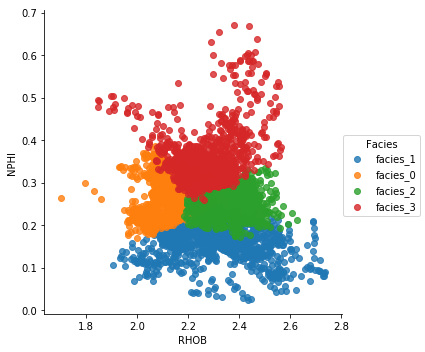

In [104]:
sns.lmplot('RHOB', 'NPHI', df_logs, hue='Facies', fit_reg=False)

In [93]:
def add_predictions(ax, predictions):
    """ Add predicted bands onto plt axes """
    
    # Scatter plot
    ax.scatter(predictions['value'], predictions['TVDSS'], marker='+')
        
    # Shaded bands
    tvds = predictions[predictions.model_name == 'high']['TVDSS']
    x_hi = predictions[predictions.model_name == 'high']['value']
    x_lo = predictions[predictions.model_name == 'low']['value']

    ax.fill(np.concatenate([x_lo, x_hi[::-1]]),
            np.concatenate([tvds, tvds[::-1]]),
            alpha=0.5)
    
    
def plot_predictions(df_logs, df_pred, well_name, bit_depth):
    try:
        f, ax = plots.make_log_plot(df_logs, well_name)
        predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
        
        add_predictions(ax[0], predictions)
        
        for axs in ax:
            axs.set_ylim(1800, 1760)
        plt.show()
        
        print('updated')
        
    except AssertionError:
        f, ax = plots.make_log_plot(df_logs, well_name)
        print('no predictions found at this depth in this well')


interact(plot_predictions, df_logs=fixed(df_logs), df_pred=fixed(df_pred),
         well_name=fixed(well_name), bit_depth=(1760, 1800, 1));

interactive(children=(IntSlider(value=1780, description='bit_depth', max=1800, min=1760), Output()), _dom_clas…

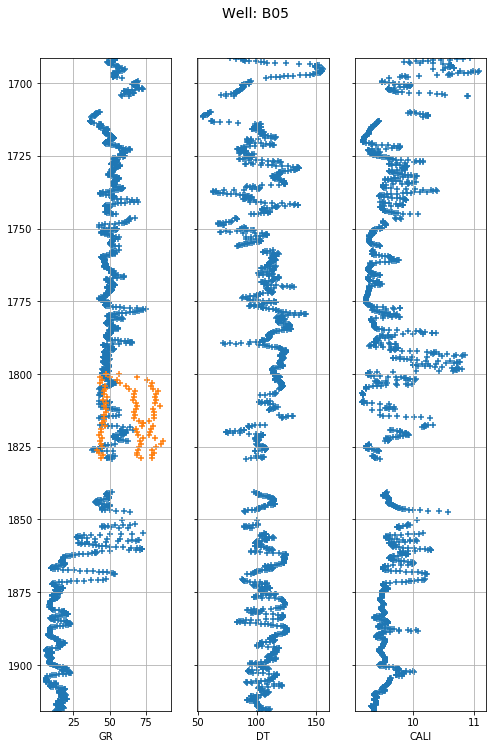

In [16]:
f, ax = plots.make_log_plot(df_logs, 'B05')
ax[0].scatter(predictions['value'], predictions['TVDSS'], marker='+')